# Project: Patients Medical Appointment Analysis


The dataset about to be analysed collects information from 100k medical appointments in Brazil. It is focused on factors ifluencing patients behaviour, as regards compliance to their sheduled appointment. The columns contain valuable information to help answers some questions, that uncover  patterns revealing the likelihood of patients showing up for their scheduled appointment or not.

'Scheduledday' tells us on what day the patient set up their appointment.
'Neighbourhood' indicates the location of the hospital.
'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Familia.
'No_show' indicates whether or not the patient showed up on appointment day: it says 'No" if the patient showed up to their appointment and says  'Yes' if the patient failed to show up. 

The questions however we would like to answer are:

1. Are people are more likely to show up for their scheduled appointment on any particular day of the week?
2. Are older or younger people more likely to keep to their appointments?
3. Does the provision of scholarship affects appointment compliance?

# Data Wrangling

The data-set file is titled 'no_show.csv'. 

At this stage, we would load the data, check for cleanliness, trim and clean the data-set where necessary, in preparation for analysis.


In [2]:
#loading dataset and viewing the first few columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking shape of the dataframe
df.shape

(110527, 14)

The dataframe consists of 110527 row and 14 columns as displayed in the cell above.

The following immediate changes would be carried out on the dataframe to clean it up and prepare it for analysis:

1.Columns would be renamed in lower cases,while columns with character '-' would be replaced with '_', doing this enables us use the query() function, enhancing flexibility for analysing this data-set.

2.'Scheduledday' and 'appointmentday' columns would be trimmed to retain meaningful information.

3.Columns 'PatientId' and'AppointmentID' would be dropped, as the information is irrelevant for the purpose of this analysis.

4.'scheduledday' and 'appointmentday' columns would be converted to datetime.

5.Duplicated values would be dropped.


In [4]:
#renaming columns and viewing new columns
df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [5]:
#trimming 'scheduledday' and 'appointmentday' columns and viewing head

new_columns = ['scheduledday', 'appointmentday']

for c in new_columns:
    df[c]=df[c].apply(lambda x: x[:10])
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#dropping 'patientid' and 'appointmentid' column and viewing new cloumns
df.drop(columns=['patientid', 'appointmentid'], inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
#viewing dtypes of dataframe
df.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show           object
dtype: object

In [8]:
#converting 'scheduledday' to datetime type
df['scheduledday']=pd.to_datetime(df['scheduledday'])

In [9]:
# converting 'appointmentday' to datetime dtype
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [10]:
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [11]:
#checking for duplicates
df.duplicated().sum()

8070

In [12]:
#dropping duplicates and reconfirming
df.drop_duplicates(inplace=True)

In [13]:
#confirming dropped duplicates and shape
df.duplicated().sum()

0

In [14]:
df.shape

(102457, 12)

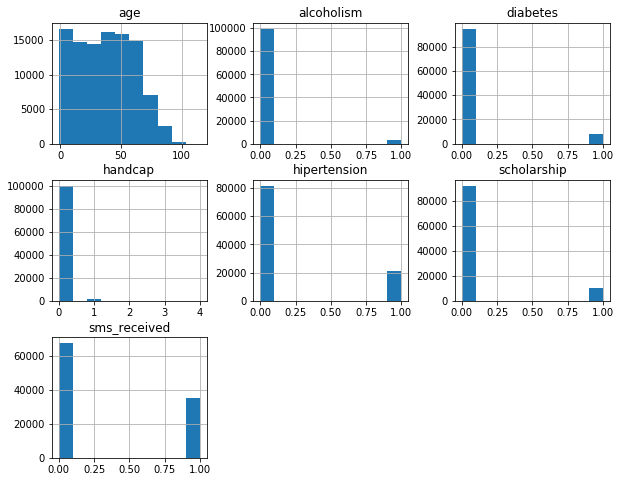

In [15]:
#exploring histogram of dataframe to get a quick glance of its features
df.hist(figsize=(10,8));

In [16]:
# exploring the statistic of the data frame
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000
mean,37.564969,0.100784,0.204905,0.075144,0.029007,0.022712,0.341353
std,23.070037,0.301044,0.403635,0.263624,0.167828,0.163239,0.474166
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#statistic show we have a negative min age value which is going to be replaced by the mean
df.loc[df['age']<0, 'age'] = df.age.mean()

In [18]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000,102457.000000
mean,37.565345,0.100784,0.204905,0.075144,0.029007,0.022712,0.341353
std,23.069722,0.301044,0.403635,0.263624,0.167828,0.163239,0.474166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Question 1

Are people are more likely to make their scheduled appointment or not, for any particular day of the week.

To answer this question we need to add an extra column 'app_dow' that specifies the day of the week for 'appointmentday'

we do that with pandas dt.dayofweek function

where Monday is cosidered the first day of the week denoted by 0
and Sunday the last day of the week denoted by 6

In [19]:
#adding new column to data frame
df['app_dow']=df['appointmentday'].dt.dayofweek

In [20]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_dow
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [21]:
#defining dependent variable for patients successful/unsuccessful scheduled appointment
pr = df.no_show == 'No'
ab = df.no_show == 'Yes'

Viewing the distribution for app_dow for successful and unsuccessful scheduled appointments.

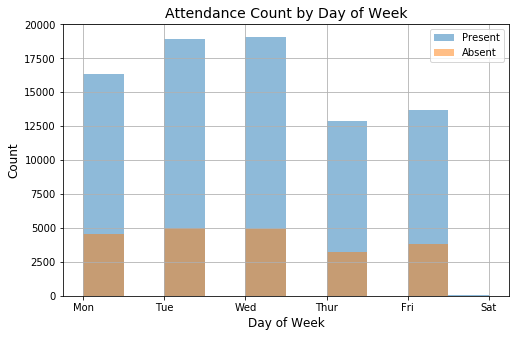

In [144]:
plt.subplots(figsize=(8,5))
df.app_dow[pr].hist(alpha=0.5, label='Present')
df.app_dow[ab].hist(alpha=0.5, label='Absent')
plt.title('Attendance Count by Day of Week', fontsize=14)
plt.xticks([0, 1, 2, 3, 4, 5], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.xlabel('Day of Week',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend();


Checking relationship between gender and appointment day of week with respect to showing up

In [120]:
df.groupby(['gender', 'app_dow'])['no_show'].value_counts()

gender  app_dow  no_show
F       0        No         10605
                 Yes         3003
        1        No         12454
                 Yes         3337
        2        No         12557
                 Yes         3204
        3        No          8302
                 Yes         2106
        4        No          8918
                 Yes         2497
        5        No            22
                 Yes            7
M       0        No          5771
                 Yes         1532
        1        No          6448
                 Yes         1656
        2        No          6517
                 Yes         1696
        3        No          4561
                 Yes         1134
        4        No          4787
                 Yes         1333
        5        No             8
                 Yes            2
Name: no_show, dtype: int64

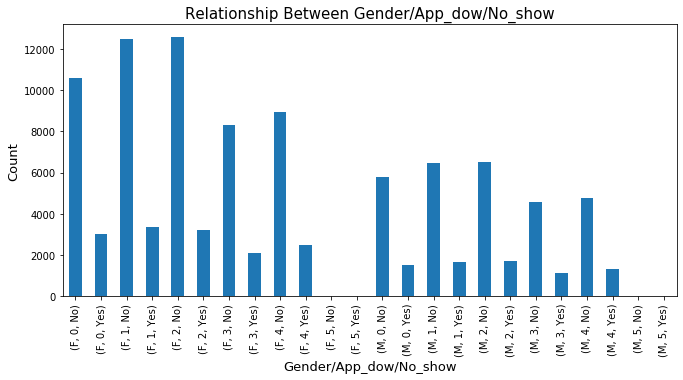

In [132]:
#visualizing the information on a bar graph
plt.subplots(figsize=(11,5))
df.groupby(['gender', 'app_dow'])['no_show'].value_counts().plot(kind='bar')
plt.title('Relationship Between Gender/App_dow/No_show', fontsize=15)
plt.xlabel('Gender/App_dow/No_show', fontsize=13)
plt.ylabel('Count', fontsize=13);

Interpretation:
The Female gender registered the higher number across each day of the week and reflect the highest number on Wednesday for patients who showed up on their scheduled appointment day.

Checking for correlation between gender and application day of week

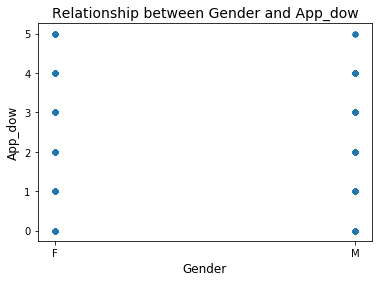

In [182]:
df.plot(x='gender', y='app_dow', kind='scatter')
plt.title('Relationship between Gender and App_dow', fontsize=14);
plt.xlabel('Gender', fontsize=12)
plt.ylabel('App_dow', fontsize=12);

Interpretation:
Scatter plot showed no correlation between app_dow and gender

Checking relationship between application day of the week and sms with respect to showing up

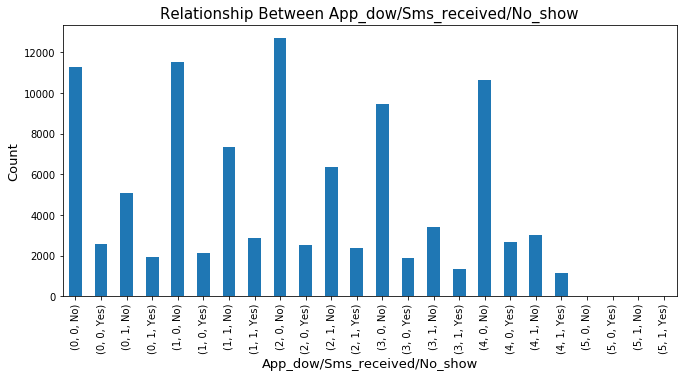

In [136]:
plt.subplots(figsize=(11,5))
df.groupby(['app_dow', 'sms_received']).no_show.value_counts().plot(kind='bar')
plt.title('Relationship Between App_dow/Sms_received/No_show', fontsize=15)
plt.xlabel('App_dow/Sms_received/No_show', fontsize=13)
plt.ylabel('Count', fontsize=13);

Interpretation:
Patients who showed up without receiving an sms were more in number than those who received an sms, and reflected the highest number on Wednesday for patients that showed up.
Generally patients who did not receive sms far out number those who did

Checking correlation between  application day of week and sms received by plotting a scatter chart

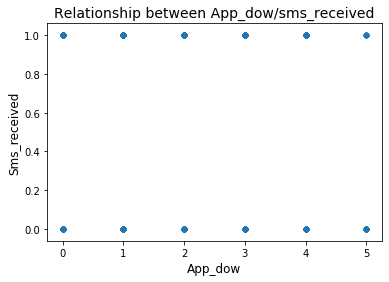

In [184]:
df.plot(x='app_dow', y='sms_received', kind='scatter')
plt.title('Relationship between App_dow/sms_received', fontsize=14)
plt.xlabel('App_dow', fontsize=12)
plt.ylabel('Sms_received', fontsize=12);

Interpretation:
plot shows no correlation between application day of week and no_show.

# Question 2

Are older or younger people were more likely to keep to the appointment schedule?

In [29]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_dow
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [30]:
mean_age = df.groupby('no_show')['age'].mean()
mean_age

no_show
No     38.378710
Yes    34.503929
Name: age, dtype: float64

The mean age for patients who showed up for their scheduled appointment appear to be higher than the mean for those that failed to show up.

Diving deeper by viewing the age distribution with a histogram.

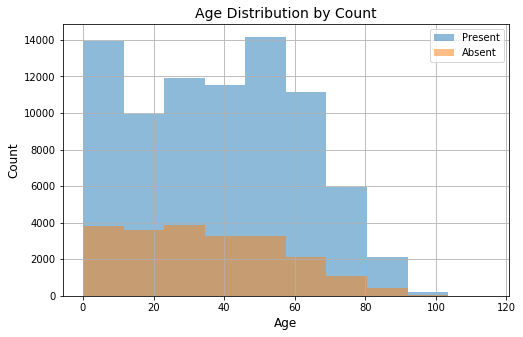

In [31]:
plt.subplots(figsize=(8,5))
df.age[pr].hist(alpha=0.5, label='Present')
df.age[ab].hist(alpha=0.5, label='Absent')
plt.title('Age Distribution by Count', fontsize=14)
plt.xlabel('Age', fontsize= 12)
plt.ylabel('Count', fontsize=12)
plt.legend();

Generally more people were present than absent for their scheduled appointment across all age groups, which likely influenced the higher age mean for those that were present.

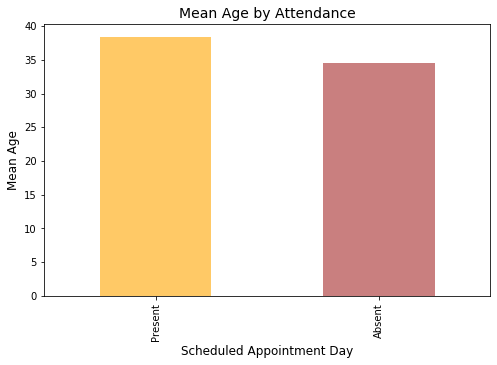

In [32]:
plt.subplots(figsize=(8,5))
mean_age.plot(kind='bar', color=['orange', 'brown'], alpha=0.6)
plt.title('Mean Age by Attendance', fontsize=14)
plt.xticks([0,1], ['Present', 'Absent'])
plt.xlabel('Scheduled Appointment Day', fontsize=12)
plt.ylabel('Mean Age', fontsize=12);

The mean age for patients revealed considerable higher figure for those who showed up on scheduled appointment day, than those that failed to make the appointment.

To effectively analyse age we have to create a new column from the 'age' column by splitting it in two along the median, one for older another for younger category

In [146]:
df.age.min(), df.age.median(), df.age.max()

(0.0, 37.0, 115.0)

In [165]:
df['age_grade']= pd.cut(x=df['age'], bins=[0, 37, 116], labels=['yng', 'old'], right=False)

In [166]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_dow,age_grade
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4,old


In [185]:
#confirming column has no null and checking number of row presennt.
df.age_grade.isnull().sum(), df.age_grade.count()

(0, 102457)

In [168]:
#checking relationship between age grade and diabetes with respect to showing up
df.groupby(['age_grade', 'diabetes'])['no_show'].value_counts()

age_grade  diabetes  no_show
yng        0         No         37750
                     Yes        11819
           1         No           228
                     Yes           88
old        0         No         36907
                     Yes         8282
           1         No          6065
                     Yes         1318
Name: no_show, dtype: int64

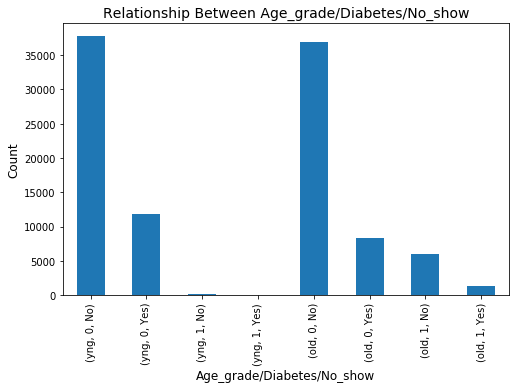

In [190]:
#plotting on graph for visualization
plt.subplots(figsize=(8,5))
df.groupby(['age_grade', 'diabetes'])['no_show'].value_counts().plot(kind='bar')
plt.title('Relationship Between Age_grade/Diabetes/No_show', fontsize=14)
plt.xlabel('Age_grade/Diabetes/No_show', fontsize=12)
plt.ylabel('Count', fontsize=12);

Interpretation:
Younger patient without diabetes who showed up registered the highest number.

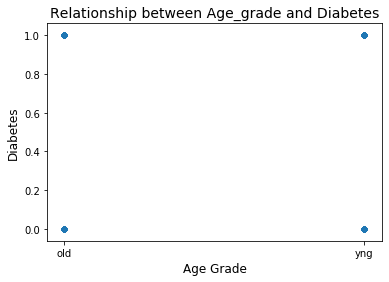

In [193]:
df.plot(x='age_grade', y='diabetes', kind='scatter')
plt.title('Relationship between Age_grade and Diabetes', fontsize=14)
plt.xlabel('Age Grade', fontsize=12)
plt.ylabel('Diabetes', fontsize=12);

Scatter plot show no strong correlation between age grade and diabetes

Checking relationship between age grade and hipertension with respect to showing up

In [171]:
df.groupby(['age_grade', 'hipertension'])['no_show'].value_counts()

age_grade  hipertension  no_show
yng        0             No         37211
                         Yes        11691
           1             No           767
                         Yes          216
old        0             No         26418
                         Yes         6143
           1             No         16554
                         Yes         3457
Name: no_show, dtype: int64

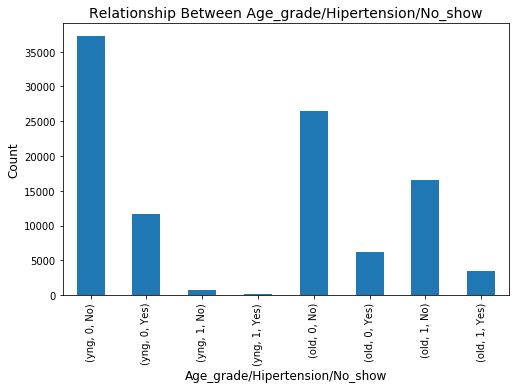

In [174]:
plt.subplots(figsize=(8,5))
df.groupby(['age_grade', 'hipertension'])['no_show'].value_counts().plot(kind='bar')
plt.title('Relationship Between Age_grade/Hipertension/No_show', fontsize=14)
plt.xlabel('Age_grade/Hipertension/No_show', fontsize=12)
plt.ylabel('Count', fontsize=12);

Interpretation
Young patient without hipertention who showed up register the highest number

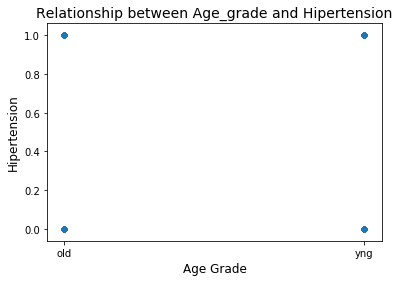

In [180]:
df.plot(x='age_grade', y='hipertension', kind='scatter')
plt.title('Relationship between Age_grade and Hipertension', fontsize=14);
plt.xlabel('Age Grade', fontsize=12)
plt.ylabel('Hipertension', fontsize=12);

Interpretation:
Relationship show strong clear correlation

# Question 3
Do provision of scholarship affect appointment schedule compliance.

In [39]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_dow
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [77]:
df.scholarship[pr].value_counts()

0    73106
1     7844
Name: scholarship, dtype: int64

In [95]:
df.scholarship[ab].value_counts()

0    19025
1     2482
Name: scholarship, dtype: int64

Visualizing scholarship counts on a bar chat for scheduled appointment

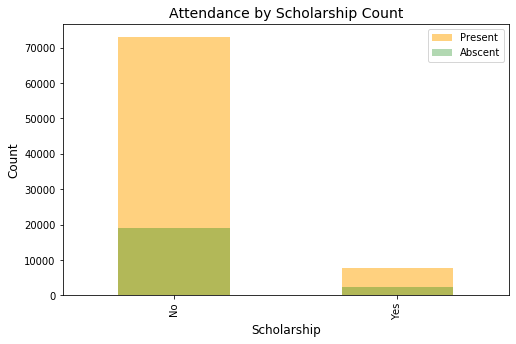

In [112]:
plt.subplots(figsize=(8,5))
df.scholarship[pr].value_counts().plot(kind='bar', alpha=0.5, color= 'orange', label='Present')
df.scholarship[ab].value_counts().plot(kind= 'bar', alpha=0.3, color= 'green', label='Abscent')
plt.title('Attendance by Scholarship Count', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Scholarship', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend();

Chart Interpretation
Majority of the patients who showed up were without scholarship

In [96]:
#mean scholarship is lower for patients who showed up and higher for those who failed to show up.

df.scholarship[pr].mean(), df.scholarship[ab].mean()

(0.09689932056825201, 0.11540428697633329)

Checking for relationship between scholarship and gender with respect to patients showing up

In [43]:
df.groupby(['scholarship', 'gender'])['no_show'].value_counts()

scholarship  gender  no_show
0            F       No         46442
                     Yes        12097
             M       No         26664
                     Yes         6928
1            F       No          6416
                     Yes         2057
             M       No          1428
                     Yes          425
Name: no_show, dtype: int64

Text(0.5, 0, 'Scholarship/gender/No_show')

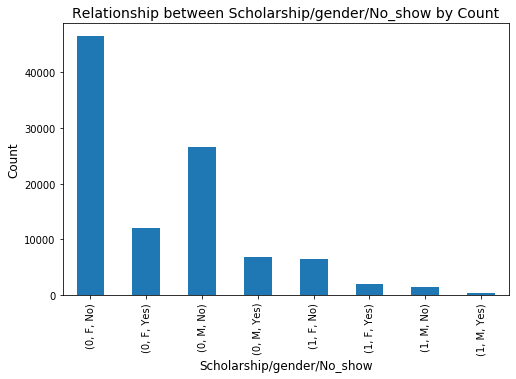

In [103]:
# plotting it on a bar chart for visualization
plt.subplots(figsize=(8,5))
df.groupby(['scholarship', 'gender'])['no_show'].value_counts().plot(kind='bar')
plt.title('Relationship between Scholarship/gender/No_show by Count', fontsize=14 )
plt.ylabel('Count', fontsize=12);
plt.xlabel('Scholarship/gender/No_show',fontsize=12)

Interpretation
Patients without scholarship were higher in attendance than patients with scholarship, with the female gender more in number than the male.

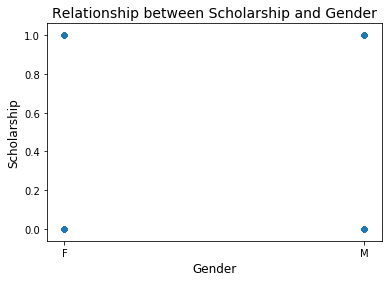

In [198]:
df.plot(x='gender', y='scholarship', kind='scatter')
plt.title('Relationship between Scholarship and Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Scholarship', fontsize=12);

The scatter plot shows no correlation between gender and scholarship

Checking relationship between scholarship and diabetes with respect to patients showing up

In [46]:
df.groupby(['scholarship', 'diabetes'])['no_show'].value_counts()

scholarship  diabetes  no_show
0            0         No         67243
                       Yes        17741
             1         No          5863
                       Yes         1284
1            0         No          7414
                       Yes         2360
             1         No           430
                       Yes          122
Name: no_show, dtype: int64

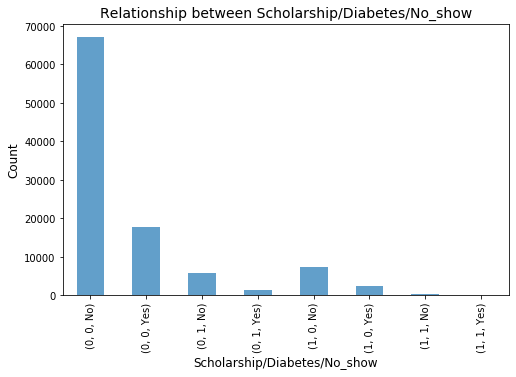

In [109]:
#showing relationship with scholarship and diabetes with respect to showing up on scheduled appointment day
plt.subplots(figsize=(8,5))
df.groupby(['scholarship', 'diabetes'])['no_show'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('Relationship between Scholarship/Diabetes/No_show', fontsize=14)
plt.xlabel('Scholarship/Diabetes/No_show', fontsize=12)
plt.ylabel('Count', fontsize=12);

Interpetation:
Diabetic patients without scholarship who showed up are the highest in number

Plotting a scatter diagram to see relationship between scholarship and diabetes

Text(0, 0.5, 'Diabetes')

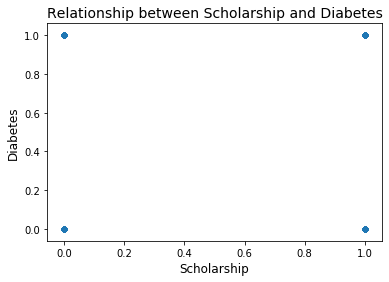

In [195]:
df.plot(x='scholarship', y='diabetes', kind='scatter')
plt.title('Relationship between Scholarship and Diabetes', fontsize=14)
plt.xlabel('Scholarship', fontsize=12)
plt.ylabel('Diabetes', fontsize=12)

Scatter plot show no strong relationship betwee scholarship and diabetic patients

In [196]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,app_dow,age_grade
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4,old


Interpretation
Patients with neither scholarship nor diabetes were the most in number.

# Conclusion

After completing the analysis, if we want to predict wether a patient would show up for their scheduled medical appointment, use the below formular:


Gender: F

Sms_received: 0

Scholarship: 0

Diabetes: 0

sms_received: 0

App_dow: Wed

Age_grade: Yng


### Limitations:

By following the formular above, there is a high probability of predicting whether the patient would show up on the day of their scheduled appointment or not, the prediction might not be completely true as data might have some errors, as we have seen in some columns holding wrong values like the min age represented as a negative number, the population of female was more than double that of men, which creates a bias when analysis with the gender factor, new columns were introduced by manipulating existing columns as well, columns with values suspected to be wrong was replaced by the mean value for the column
